In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline
import input_data
import numpy

In [2]:
import sys
import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/gzip.py:275: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  chunk = self.extrabuf[offset: offset + size]
input_data.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


* 定義 Input 及 Output 暫存變數
* Input 為 28x28 的點陣圖素
* Output 為 10 個 Label Array ，分別代表著 0~9 的預測值

In [12]:
session = tf.Session()

In [6]:
x = tf.placeholder(tf.float32,shape=[28*28])

In [8]:
allx = tf.placeholder(tf.float32,shape=[None,28**2])

In [47]:
testimage = mnist.test.images[0]

* 使用 reduce sum 來計算測試圖片與所有的 Training 圖片的的距離
* reduce sum 請參考 : https://www.tensorflow.org/versions/r0.11/api_docs/python/math_ops.html#reduce_sum

In [48]:
dist = tf.reduce_sum(tf.abs(tf.sub(x,allx)), reduction_indices=1)

In [55]:
l2dist = session.run(tf.reduce_sum(tf.sub(x,allx),1),feed_dict={x:testimage,allx:mnist.train.images})

* 距離最近的那張圖片及為預測結果

In [56]:
predict = tf.arg_min(dist,0)
predictl2 = tf.arg_min(l2dist,0)


In [57]:
def dopredict(testimage):
    return (session.run(predict,feed_dict={x:testimage,allx:mnist.train.images}),
            session.run(predict,feed_dict={x:testimage,allx:mnist.train.images}))

In [58]:
def draw(img):
    tmp = img
    tmp2 = tmp.reshape((28,28))

    plt.imshow(tmp2, cmap = cm.Greys)
    plt.show()


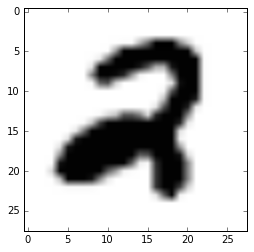

7213 7213


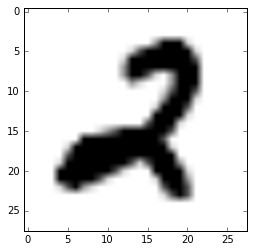

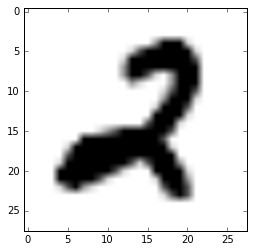

In [66]:
import random
for img in  list(map(lambda _: random.choice(mnist.test.images), range(1))): #mnist.train.images[50:55]:
    draw(img)
    
    p,p2 = dopredict(img)
    print p,p2
    draw(mnist.train.images[p])
    draw(mnist.train.images[p2])

# 結論
* knn 